<a href="https://colab.research.google.com/github/TanushreeMaithani/Project/blob/main/Minor_Project_Image_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader

In [2]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [3]:
from bing_image_downloader import downloader
downloader.download("purple orchid",limit=30,output_dir="images",adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://www.carolebamford.com/wp-content/uploads/2014/07/Wild_Orchid_02.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://imagenesdelmedioambiente.com/wp-content/uploads/2016/12/imagenes-de-plantas-terrestres-nombres.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://plants.squakmtnursery.com/Content/Images/Photos/F605-16.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.listchallenges.com/f/lists/4cb544aa-325d-4fdb-9083-f5c8f31ec9a2.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.pixelstalk.net/wp-content/uploads/2015/12/Lavender-Fields-in-Provence.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.orchidsmadeeasy.com/wdp/wp-content/uploads/Purple-Orchid.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://www.minnesotawildflowers.info/udata/r9ndp23q/pd/aplectrum-hyemale-8.jpg
[%] File Downloaded !

[%]

In [4]:
downloader.download("red rose",limit=30,output_dir="images",adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.hdwallpapers.in/download/red_rose_blume_flower_4k_hd-1280x720.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://ohbestdayever.com/wp-content/uploads/2018/02/greenery-and-burgundy-moody-fall-wedding-bouquet.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.rosesandrings.com/wp-content/uploads/2018/01/rustic-country-burgundy-wedding-sweetheart-table-2.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.monbelami.com/wp-content/uploads/2015/09/18-rose-bridal-red.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.hdwallpapers.in/download/skull__rose_petals-2560x1440.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.wallpapers13.com/wp-content/uploads/2015/12/Lotus-Flower-Wallpaper-HD-Download-Of-Pink-Lotus-Flower-2560X1600-1920x1440.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.parf

In [5]:
downloader.download("white lily",limit=30,output_dir="images",adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://www.wallpapers13.com/wp-content/uploads/2015/12/Flower-pink-lotus-flower-and-lily-pads-2560X1600-1600x1200.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://s-media-cache-ak0.pinimg.com/736x/29/9b/8c/299b8ccf93c8b976c5c7acc29ba58c9d.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://wallpapersdsc.net/wp-content/uploads/2016/09/Dandelion-Images.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.slaneyflowers.com/media/catalog/product/cache/1/image/1800x/a4b21b4001cc2132ccb620aaa30c5ed7/i/m/imageload_3__6_1.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.wallpapers13.com/wp-content/uploads/2015/12/Tulip-field-desktop-background-2560x1600-1920x1440.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.hdwallpapers.in/download/colorful_sunflower_during_raining_hd_flowers-1600x900.jpg
[%] File Downloaded !

[%] Downl

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['purple orchid','red rose','white lily']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability= True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [9]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [10]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://images.unsplash.com/photo-1534885320675-b08aa131cc5e?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1000&q=80
(1333, 1000, 3)
 PREDICTED OUTPUT: red rose


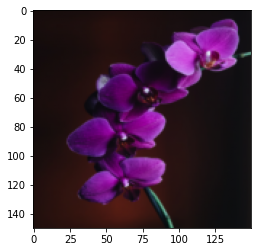

In [11]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [12]:
!pip install streamlit

!pip install pyngrok==4.1.1
from pyngrok import ngrok

In [13]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle 
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding', False)
st.title('Image Classifier using Machine Learning')
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image...", type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['purple orchid','red rose','white lily']
    st.write('Result...')
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')

Overwriting app.py


In [14]:
!nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://7aeba7de298a.ngrok.io'